# Proof that LSTM works better than GRU & RNN on Long Sequences by `Mr. Harshit Dawar!`

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Input, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def returnLabels(x, index1, index2, index3):
    # x is the sequence in this fucntion
    
    # Specifying the conditions below to categorise the points into 2 categories.
    if x[index1] < 0 and x[index2] < 0 and x[index3] < 0:
        return 1
    elif x[index1] < 0 and x[index2] > 0 and x[index3] > 0:
        return 1
    elif x[index1] > 0 and x[index2] > 0 and x[index3] < 0:
        return 1
    elif x[index1] > 0 and x[index2] < 0 and x[index3] > 0:
        return 1
    else:
        return 0

## Generating Shorter Sequences which are easy to remember

In [6]:
Sequence_Length = 9
data = []
labels = []

for i in range(5000):
    temp = np.random.randn(Sequence_Length)
    data.append(temp)
    
    # Using the Last 3 elements of the sequence for the category prediction which is easy!
    labels.append(returnLabels(temp, -1, -2, -3))
    
data, labels = np.array(data), np.array(labels)

## Building a AR Model with sigmoid activation function because it is classification problem & have only classes, & also sigmoid ranges from 0 to 1.

In [9]:
inputShape = Input(shape = (Sequence_Length, ))
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
79/79 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.4776 - val_loss: 0.8733 - val_accuracy: 0.4808
Epoch 2/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.4740 - val_loss: 0.8415 - val_accuracy: 0.4800
Epoch 3/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.4768 - val_loss: 0.8129 - val_accuracy: 0.4832
Epoch 4/300
79/79 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.478

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4976
Epoch 55/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6939 - val_accuracy: 0.4940
Epoch 56/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5124 - val_loss: 0.6940 - val_accuracy: 0.4924
Epoch 57/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4900
Epoch 58/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5148 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 59/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4960
Epoch 60/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 61/300
79/79 

Epoch 112/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5048 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 113/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5080 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 114/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5016 - val_loss: 0.6942 - val_accuracy: 0.4960
Epoch 115/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.5028
Epoch 116/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6942 - val_accuracy: 0.5012
Epoch 117/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 118/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6940 - val_accuracy: 0.4952

79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 170/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 171/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5112 - val_loss: 0.6941 - val_accuracy: 0.4992
Epoch 172/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 173/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6942 - val_accuracy: 0.4912
Epoch 174/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5128 - val_loss: 0.6943 - val_accuracy: 0.4964
Epoch 175/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 176/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6940 - val_accuracy: 0.4904
Epoch 227/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6941 - val_accuracy: 0.4964
Epoch 228/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6942 - val_accuracy: 0.4916
Epoch 229/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5068 - val_loss: 0.6941 - val_accuracy: 0.4944
Epoch 230/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5036 - val_loss: 0.6940 - val_accuracy: 0.4992
Epoch 231/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5116 - val_loss: 0.6940 - val_accuracy: 0.4952
Epoch 232/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.4968
Epoch 233/300

79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5072 - val_loss: 0.6939 - val_accuracy: 0.4976
Epoch 284/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 285/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5096 - val_loss: 0.6937 - val_accuracy: 0.4964
Epoch 286/300
79/79 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6940 - val_accuracy: 0.4976
Epoch 287/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5076 - val_loss: 0.6941 - val_accuracy: 0.4936
Epoch 288/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5044 - val_loss: 0.6941 - val_accuracy: 0.4908
Epoch 289/300
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4984 - val_loss: 0.6941 - val_accuracy: 0.4948
Epoch 290/300

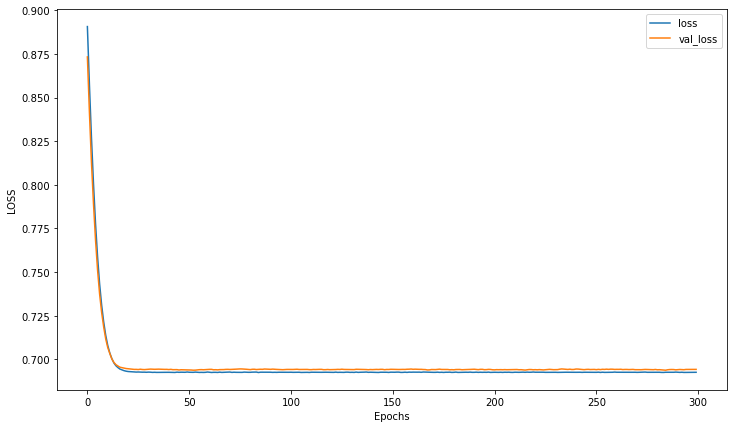

In [12]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

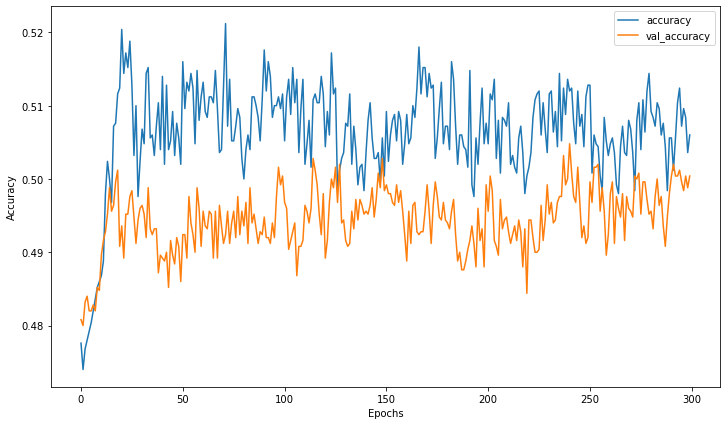

In [16]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***It is been seen that how poor the accuracy of the Simple Model is!***

## Generating SimpleRNN

## Generating GRU

In [ ]:
inputShape = Input(shape = (Sequence_Length, 1))
LayerStack = GRU(10)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(inputShape)

ARModel = Model(inputShape, LayerStack)
ARModel.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])
ARModel.summary()

trainedModel = ARModel.fit(data, labels, epochs = 300, validation_split = 0.5)

In [17]:
data.shape

(5000, 9)